# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.array([[1,3],
           [ 1,2]])
b=np.array([1,0])
np.linalg.inv(A)@b # @ -> multiplicación matricial

array([-2.,  1.])

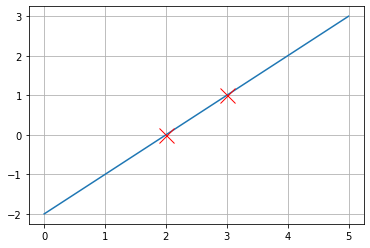

In [3]:
def linmod(x):
    return -2+x
x=np.linspace(0,5,10)
plt.plot(x,linmod(x))
plt.plot([3,2],[1,0],'xr',ms=15)
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
A=np.array([[1,0,0],
           [1,1,1],
           [1,2,4]])
b=np.array([1,0,1])
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

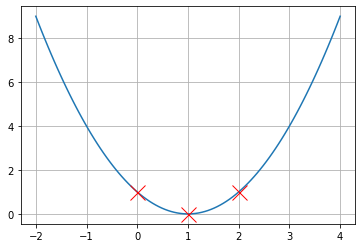

In [7]:
def modelo(x):
    return x**2-2*x+1
x=np.linspace(-2,4,100)
plt.plot(x,modelo(x))
plt.plot([0,1,2],[1,0,1],'xr',ms=15)
plt.grid()

In [8]:
modelo(2)

1

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

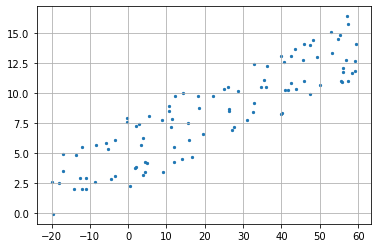

In [15]:
x=np.random.uniform(-20,60,100)
y=5+3/20*x+np.random.uniform(-3,3,100)
plt.scatter(x,y,s=5) # s=size
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [16]:
import scipy.optimize as opt

In [18]:
opt.minimize?

In [19]:
# Función objetivo
# Criterio de minimización
# Mínimos cuadrados
def obj_lin(beta,x,y):
    f=beta[0]+beta[1]*x
    return np.sum((y-f)**2)

In [37]:
beta0=np.random.rand(2)
beta0

array([0.29029751, 0.84211082])

In [39]:
sol_lin=opt.minimize(obj_lin,beta0,args=(x,y))
sol_lin

      fun: 308.34943434770435
 hess_inv: array([[ 9.29972439e-03, -1.92680974e-04],
       [-1.92680974e-04,  8.63449514e-06]])
      jac: array([7.62939453e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([5.16099057, 0.14430816])

In [40]:
3/20

0.15

In [41]:
sol_lin.x

array([5.16099057, 0.14430816])

**El modelo óptimo lineal es**
$$
f(x)=5.161+0.144x,
$$
con error cuadrático acumulado de 308.35.

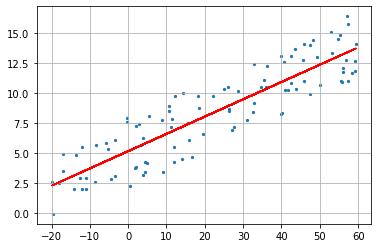

In [42]:
plt.scatter(x,y,s=5)
f=sol_lin.x[0]+sol_lin.x[1]*x # beta[0]+beta[1]*x
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

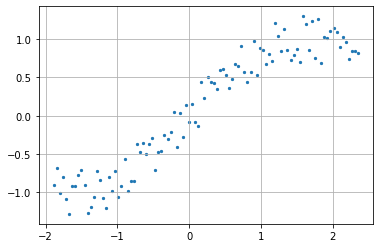

In [56]:
x=np.linspace(-3/5*np.pi,3/4*np.pi,100)
y=np.sin(x)+np.random.uniform(-0.3,0.3,100)
plt.scatter(x,y,s=5)
plt.grid()

In [46]:
n=5
for i in range(n+1):
    print(i)

0
1
2
3
4
5


In [48]:
beta=np.array([1,2,3,4])
len(beta)-1

3

In [57]:
# Obtención del modelo polinomial
def f(x,beta):
    n=len(beta)-1
    X=np.array([x**i for i in range(n+1)])
    return beta@X
x_=1.1
f(x_,beta),beta[0]+beta[1]*x_+beta[2]*x_**2+beta[3]*x_**3

(12.154000000000003, 12.154000000000003)

In [51]:
# Modificamos la función objetivo
def obj_pol(beta,x,y):
    n=len(beta)-1
    X=np.array([x**i for i in range(n+1)])
    f=beta@X # modelo polinomial a optimizar
    return np.sum((y-f)**2)

In [58]:
# Polinomio de grado uno
beta0=np.random.rand(2)
sol_1=opt.minimize(obj_pol,beta0,args=(x,y))
sol_1

      fun: 6.82070397478658
 hess_inv: array([[ 0.00518152, -0.00077039],
       [-0.00077039,  0.00326962]])
      jac: array([1.78813934e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.03322108,  0.59823654])

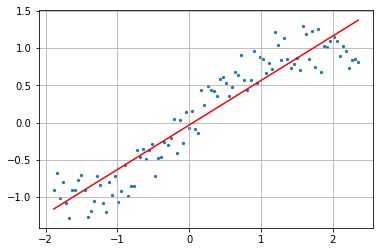

In [59]:
plt.scatter(x,y,s=5)
plt.plot(x,f(x,sol_1.x),'r')
plt.grid()

---
Resumen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

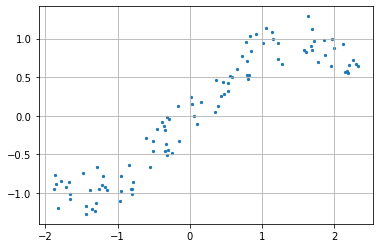

In [18]:
x=np.random.uniform(-3/5*np.pi,3/4*np.pi,100)
y=np.sin(x)+np.random.uniform(-0.3,0.3,100)
plt.scatter(x,y,s=5)
plt.grid()

In [19]:
# Modelo a ajustar (polinomio)
def f(x,beta):
    # vemos de qué orden debe ser el polinomio
    n=len(beta)-1
    # definimos el vector de potencias para 'x'
    X=np.array([x**i for i in range(n+1)]) # [x**0, x**1, x**2, ..., x**n]
    return beta@X # np.dot(beta,X) producto punto

In [20]:
# Función objetivo a minimizar (mínimos cuadrados)
def obj(beta,x,y):
    # usamos la 'f' externa como la función que vamos aproximar
    return np.sum((y-f(x,beta))**2)

In [21]:
# Aproximamos el polinomio lineal
beta0=np.random.rand(2)
sol_1=opt.minimize(obj,beta0,args=(x,y))
sol_1

      fun: 9.114318040255458
 hess_inv: array([[ 0.00507905, -0.0005052 ],
       [-0.0005052 ,  0.00322883]])
      jac: array([-1.19209290e-07, -3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.07320976,  0.56663498])

El modelo lineal que mejor se aproxima al conjunto de datos $(x,y)$ es
$$
y=-0.0737+0.586x,
$$
con un error cuadrático acumulado de $7.965$.

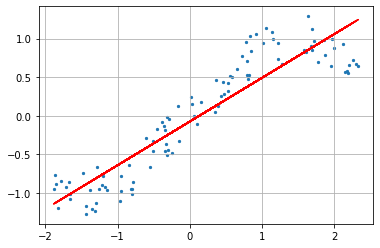

In [22]:
# Gráfica
plt.scatter(x,y,s=5)
plt.plot(x,f(x,sol_1.x),'r')
plt.grid()

---

In [23]:
# Polinomio de orden dos
beta0=np.random.rand(3) # Tres valores aleatorios
sol_2=opt.minimize(obj,beta0,args=(x,y))
sol_2

      fun: 7.459337394770032
 hess_inv: array([[ 0.01072364,  0.00110322, -0.00374835],
       [ 0.00110322,  0.00368715, -0.00106809],
       [-0.00374835, -0.00106809,  0.00248913]])
      jac: array([2.38418579e-06, 2.32458115e-06, 8.46385956e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([ 0.06347745,  0.60558402, -0.09076844])

El mejor modelo polinomial de orden dos es
$$
0.0968+0.6336x-0.1050x^2,
$$
con un error cuadrático acumulado de $5.902$.

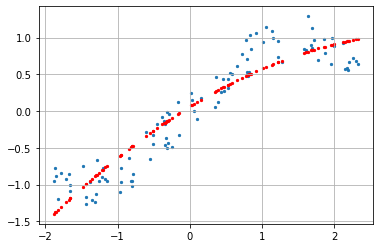

In [26]:
# Gráfica
plt.scatter(x,y,s=5)
plt.scatter(x,f(x,sol_2.x),c='r',s=5)
plt.grid()

In [31]:
# Ahora todos los polinomios juntos
#
# Creamos una lista con las soluciones
sol=[]

In [32]:
sol.append(1)
sol

[1]

In [33]:
sol.append(2)
sol

[1, 2]

In [34]:
# La definimos de nuevo para borrar los datos
sol=[]

In [35]:
N=5
for n in range(N): # 'n' va a tomar valores desde 0 hasta 4
    beta0=np.random.rand(n+2)
    sol.append(opt.minimize(obj,beta0,args=(x,y)))

In [36]:
sol[0] # Polinomio de orden uno

      fun: 9.114318040255457
 hess_inv: array([[ 0.00507905, -0.0005052 ],
       [-0.0005052 ,  0.00322883]])
      jac: array([ 1.1920929e-07, -1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.07320976,  0.56663498])

In [37]:
sol[1] # Solución del polinomio de orden dos

      fun: 7.459337394770061
 hess_inv: array([[ 0.01072364,  0.00110322, -0.00374835],
       [ 0.00110322,  0.00368715, -0.00106809],
       [-0.00374835, -0.00106809,  0.00248913]])
      jac: array([-2.98023224e-07, -2.98023224e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([ 0.06347745,  0.60558402, -0.09076845])

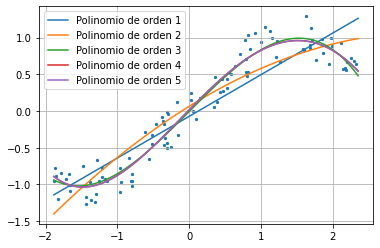

In [42]:
# Gráfica
plt.scatter(x,y,s=5)
x_ordenada=np.linspace(-3/5*np.pi,3/4*np.pi,100)
for n in range(N):
    plt.plot(x_ordenada,f(x_ordenada,sol[n].x),label='Polinomio de orden '+str(n+1))
plt.legend()
plt.grid()

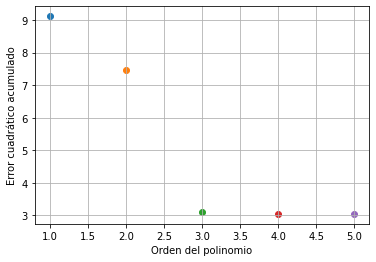

In [44]:
# Errores
for n in range(N):
    plt.scatter(n+1,sol[n].fun)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [45]:
sol[2].x # Polinomio de orden 3

array([-0.008318  ,  0.98148542, -0.00231544, -0.1385437 ])

In [46]:
sol[3].x # Polinomio de orden 4

array([ 0.01404459,  1.00040153, -0.0537808 , -0.14919413,  0.01370147])

In [47]:
sol[4].x # Polinomio de orden 5

array([ 1.40137131e-02,  1.00053507e+00, -5.36860484e-02, -1.49338997e-01,
        1.36694199e-02,  3.09985877e-05])

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [48]:
# Definimos otra función objetivo
def ridge(beta,x,y,l=0):
    # Usamos de nuevo la función 'f' externa
    return np.sum((y-f(x,beta))**2)+l*np.sum(beta**2)

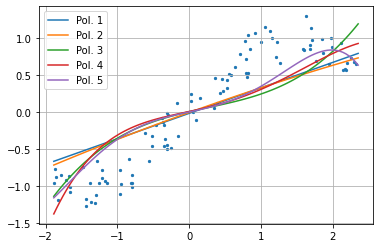

In [60]:
sol_r=[]
for n in range(N):
    beta0=np.random.rand(n+2)
    sol_r.append(opt.minimize(ridge,beta0,args=(x,y,100)))
plt.scatter(x,y,s=5)
for n in range(N):
    plt.plot(x_ordenada,f(x_ordenada,sol_r[n].x),label='Pol. '+str(n+1))
plt.legend()
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [61]:
# Definimos la función objetivo
def lasso(beta,x,y,l=0):
    return np.sum((y-f(x,beta))**2)+l*np.sum(np.abs(beta))

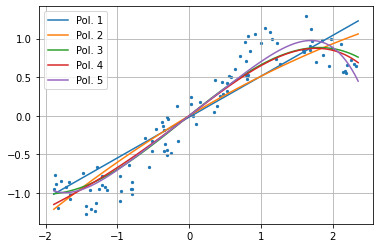

In [70]:
sol_l=[]
for n in range(N):
    beta0=np.random.rand(n+2)
    sol_l.append(opt.minimize(lasso,beta0,args=(x,y,10)))
plt.scatter(x,y,s=5)
for n in range(N):
    plt.plot(x_ordenada,f(x_ordenada,sol_l[n].x),label='Pol. '+str(n+1))
plt.legend()
plt.grid()

In [71]:
sol_l[2].x

array([-3.52350878e-09,  7.46597246e-01, -1.78140155e-02, -6.88183786e-02])

In [72]:
sol_l[3].x

array([-1.37023851e-09,  7.08723000e-01, -1.00872858e-08, -4.88233516e-02,
       -1.10991121e-02])

In [73]:
sol_l[4].x

array([-9.49313338e-08,  7.18790258e-01, -9.50869852e-09, -1.52052332e-09,
       -1.13498298e-03, -1.66558354e-02])